In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.cluster import KMeans

In [2]:
'''Data contains

    1.Name of the country,
    2.Death of children under five years of age per 1000 live births,
    3. Exports of goods and services; Exports of goods and services given as %age of the Total GDP;
    4. Imports of goods and services, Given as %age of the Total GDP;
    5. Net income per person;
    6. The measurement of the annual growth rate of the Total GDP;
    7. The average number of years a newborn child would live if the current mortality patterns are to remain the same;
    8. The number of children born to each woman if the current age-fertility rates remain the same.'''

'Data contains\n\n    1.Name of the country,\n    2.Death of children under five years of age per 1000 live births,\n    3. Exports of goods and services; Exports of goods and services given as %age of the Total GDP;\n    4. Imports of goods and services, Given as %age of the Total GDP;\n    5. Net income per person;\n    6. The measurement of the annual growth rate of the Total GDP;\n    7. The average number of years a newborn child would live if the current mortality patterns are to remain the same;\n    8. The number of children born to each woman if the current age-fertility rates remain the same.'

In [2]:
df=pd.read_csv(r"c:\Users\goex1\Desktop\DS Projekte für GITHUB\Countries\Country-data.csv")

df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [3]:
df.shape

(167, 10)

In [4]:
print(df.isna().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [5]:

X=df[['income', 'health']]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans

k=5
kmeans5 = KMeans(n_clusters=k, random_state=42)
y_pred=kmeans5.fit_predict(X_scaled)

In [6]:
kmeans5.cluster_centers_

array([[-0.52382949,  0.99454653],
       [ 2.96394558, -1.1317598 ],
       [-0.45600724, -0.62359449],
       [ 1.4960936 ,  1.84485116],
       [ 0.70603231,  0.61191565]])

In [7]:
cluster_reinverse=scaler.inverse_transform(kmeans5.cluster_centers_)


In [8]:
kmeans_iter50 = KMeans(n_clusters=5, init="random", n_init=10,algorithm="lloyd", max_iter=50, random_state=42)

kmeans_iter50.fit(X_scaled)


KMeans(init='random', max_iter=50, n_clusters=5, n_init=10, random_state=42)

In [9]:
cluster_iter50_original = scaler.inverse_transform(kmeans_iter50.cluster_centers_)

In [10]:
print("Clusterzentren nach 50 Iterationen:\n", cluster_iter50_original)


Clusterzentren nach 50 Iterationen:
 [[4.35242857e+03 1.11378571e+01]
 [7.41125000e+04 3.71625000e+00]
 [1.44714906e+04 7.33792453e+00]
 [7.49478261e+03 4.63855072e+00]
 [4.02260870e+04 1.05908696e+01]]


In [11]:
print("\nLabels nach 50 Iterationen:\n", kmeans_iter50.labels_)



Labels nach 50 Iterationen:
 [2 2 3 3 2 2 3 4 4 2 2 2 3 2 3 4 3 3 3 3 0 2 2 1 2 2 0 3 3 4 3 3 3 2 3 2 3
 2 3 0 3 2 2 2 4 2 2 3 2 3 3 2 3 4 4 3 3 0 4 3 4 3 2 3 2 3 2 2 4 3 3 3 2 4
 2 4 3 4 2 3 3 0 1 3 3 2 2 0 0 3 2 1 2 3 2 3 2 3 2 3 2 0 0 3 2 3 3 3 2 3 4
 4 3 3 4 1 3 2 3 3 3 2 4 1 3 3 0 2 1 3 0 3 0 1 2 4 2 2 2 4 3 3 3 2 4 4 3 3
 3 0 2 3 2 2 3 0 2 1 4 4 2 3 3 3 2 3 3]


In [12]:
df['Cluster']=kmeans_iter50.labels_

In [13]:
df_Ergebnisse= df[['country', 'income', 'health', 'Cluster']]
df_Ergebnisse

,country,income,health,Cluster
0,Afghanistan,1610,7.58,2
1,Albania,9930,6.55,2
2,Algeria,12900,4.17,3
3,Angola,5900,2.85,3
4,Antigua and Barbuda,19100,6.03,2
...,...,...,...,...
162,Vanuatu,2950,5.25,3
163,Venezuela,16500,4.91,3
164,Vietnam,4490,6.84,2
165,Yemen,4480,5.18,3


In [14]:
countries_by_cluster=df_Ergebnisse.groupby("Cluster")['country'].apply(list).reset_index()

In [15]:
countries_by_cluster

,Cluster,country
0,0,"[Bosnia and Herzegovina, Burundi, Costa Rica, ..."
1,1,"[Brunei, Kuwait, Luxembourg, Oman, Qatar, Saud..."
2,2,"[Afghanistan, Albania, Antigua and Barbuda, Ar..."
3,3,"[Algeria, Angola, Armenia, Bangladesh, Belarus..."
4,4,"[Australia, Austria, Belgium, Canada, Denmark,..."


In [16]:
cluster0_länder = df_Ergebnisse[df_Ergebnisse['Cluster'] == 0]
cluster0_länder

,country,income,health,Cluster
20,Bosnia and Herzegovina,9720,11.10,0
26,Burundi,764,11.60,0
39,Costa Rica,13000,10.90,0
57,Georgia,6730,10.10,0
81,Kiribati,1730,11.30,0
87,Lesotho,2380,11.10,0
88,Liberia,700,11.80,0
101,"Micronesia, Fed. Sts.",3340,14.20,0
102,Moldova,3910,11.70,0
126,Rwanda,1350,10.50,0


In [17]:
cluster1_länder = df_Ergebnisse[df_Ergebnisse['Cluster'] == 1]
cluster1_länder

,country,income,health,Cluster
23,Brunei,80600,2.84,1
82,Kuwait,75200,2.63,1
91,Luxembourg,91700,7.77,1
115,Oman,45300,2.77,1
123,Qatar,125000,1.81,1
128,Saudi Arabia,45400,4.29,1
133,Singapore,72100,3.96,1
157,United Arab Emirates,57600,3.66,1


In [18]:
cluster2_länder = df_Ergebnisse[df_Ergebnisse['Cluster'] == 2]
cluster2_länder

,country,income,health,Cluster
0,Afghanistan,1610,7.58,2
1,Albania,9930,6.55,2
4,Antigua and Barbuda,19100,6.03,2
5,Argentina,18700,8.10,2
9,Azerbaijan,16000,5.88,2
10,Bahamas,22900,7.89,2
11,Bahrain,41100,4.97,2
13,Barbados,15300,7.97,2
21,Botswana,13300,8.30,2
22,Brazil,14500,9.01,2


In [19]:
cluster3_länder = df_Ergebnisse[df_Ergebnisse['Cluster'] == 3]
cluster3_länder

,country,income,health,Cluster
2,Algeria,12900,4.17,3
3,Angola,5900,2.85,3
6,Armenia,6700,4.40,3
12,Bangladesh,2440,3.52,3
14,Belarus,16200,5.61,3
...,...,...,...,...
161,Uzbekistan,4240,5.81,3
162,Vanuatu,2950,5.25,3
163,Venezuela,16500,4.91,3
165,Yemen,4480,5.18,3


In [20]:
cluster4_länder = df_Ergebnisse[df_Ergebnisse['Cluster'] == 4]
cluster4_länder

,country,income,health,Cluster
7,Australia,41400,8.73,4
8,Austria,43200,11.00,4
15,Belgium,41100,10.70,4
29,Canada,40700,11.30,4
44,Denmark,44000,11.40,4
53,Finland,39800,8.95,4
54,France,36900,11.90,4
58,Germany,40400,11.60,4
60,Greece,28700,10.30,4
68,Iceland,38800,9.40,4


In [21]:
print("Cluster0 Analysis:")
print('mean income:', cluster0_länder['income'].mean())
print('mean expenditure in % in health', cluster0_länder['health'].mean())

print("Cluster1 Analysis:")
print('mean income:', cluster1_länder['income'].mean())
print('mean expenditure in % in health', cluster1_länder['health'].mean())

print("Cluster2 Analysis:")
print('mean income:', cluster2_länder['income'].mean())
print('mean expenditure in % in health', cluster2_länder['health'].mean())

print("Cluster3 Analysis:")
print('mean income:', cluster3_länder['income'].mean())
print('mean expenditure in % in health', cluster3_länder['health'].mean())

print("Cluster4 Analysis:")
print('mean income:', cluster4_länder['income'].mean())
print('mean expenditure in % in health', cluster4_länder['health'].mean())

Cluster0 Analysis:
mean income: 4352.428571428572
mean expenditure in % in health 11.137857142857143
Cluster1 Analysis:
mean income: 74112.5
mean expenditure in % in health 3.7162499999999996
Cluster2 Analysis:
mean income: 14471.490566037735
mean expenditure in % in health 7.337924528301886
Cluster3 Analysis:
mean income: 7494.782608695652
mean expenditure in % in health 4.638550724637681
Cluster4 Analysis:
mean income: 40226.086956521736
mean expenditure in % in health 10.59086956521739


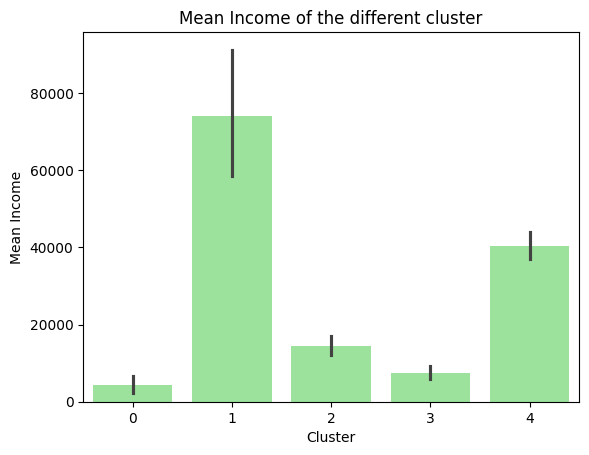

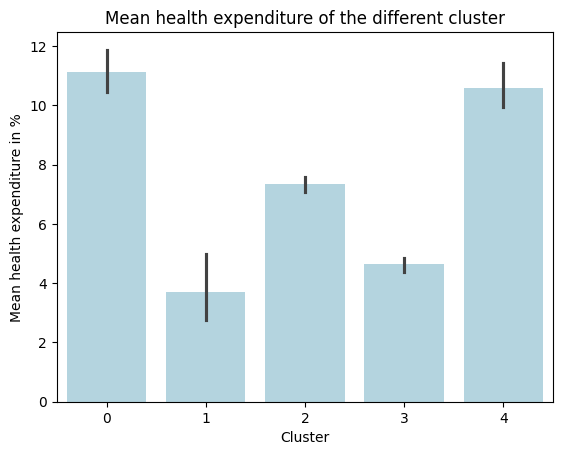

In [31]:
sns.barplot(data=df,x='Cluster', y='income',color='lightgreen')
plt.title('Mean Income of the different cluster')
plt.ylabel('Mean Income')
plt.show()

sns.barplot(data=df,x='Cluster', y='health',color='lightblue')
plt.title('Mean health expenditure of the different cluster')
plt.ylabel('Mean health expenditure in %')
plt.show()

## Interpretation der Cluster

### Cluster 0:

Einkommen → sehr niedrig

Gesundheitsausgaben in  % → sehr hoch

Interpretation:
Sehr arme Länder, die trotzdem einen hohen Anteil ihres BIP für Gesundheit ausgeben.


### Cluster 1: 

Einkommen: → extrem hoch

Gesundheitsausgaben in  % → niedrig

Interpretation:
Sehr wohlhabende Länder, die relativ wenig vom BIP für Gesundheit ausgeben.

### Cluster 2

Einkommen → mittelhoch

Gesundheitsausgaben in % → hoch

Interpretation:
Länder mit mittlerem Einkommen, die dennoch einen hohen Anteil für Gesundheit ausgeben.

### Cluster 3

Einkommen → niedrig

Gesundheitsausgaben in % → niedrig

Interpretation:
Armut + geringe Gesundheitsausgaben

### Cluster 4

Einkommen → hoch

Gesundheitsausgaben in % → sehr hoch

Interpretation:
Reiche Länder, die sehr stark in Gesundheit investieren.